<a href="https://colab.research.google.com/github/FarshadAmiri/Learning-Machine_Learning/blob/master/K-Means_sklearn_simple_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.metrics import silhouette_score
%matplotlib inline

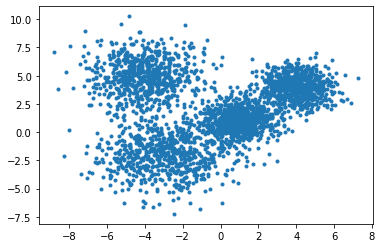

In [289]:
data1 = make_blobs(n_samples=1500, centers=[[4,4], [1, 1]], cluster_std=1)[0]
data2 = make_blobs(n_samples=700, centers=[[-3, -2]], cluster_std=1.7)[0]
data3 = make_blobs(n_samples=700, centers=[[-4,5]], cluster_std=1.5)[0]
data = np.vstack((data1, data2, data3))

# data1 = make_blobs(n_samples=1500, centers=[[5,5], [1, 0]], cluster_std=0.8)[0]
# data2 = make_blobs(n_samples=700, centers=[[-3, -2]], cluster_std=1)[0]
# data3 = make_blobs(n_samples=700, centers=[[-4,5]], cluster_std=1)[0]
# data = np.vstack((data1, data2, data3))

plt.scatter(data[:, 0], data[:, 1], marker='.')

In [290]:
data.shape

(2900, 2)

In [291]:
kmeans = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [292]:
print('kmeans.labels_.shape ->',kmeans.labels_.shape)
unique_labels = np.unique(kmeans.labels_)
print('Unique labels are ->',unique_labels)

kmeans.labels_.shape -> (2900,)
Unique labels are -> [0 1 2 3]


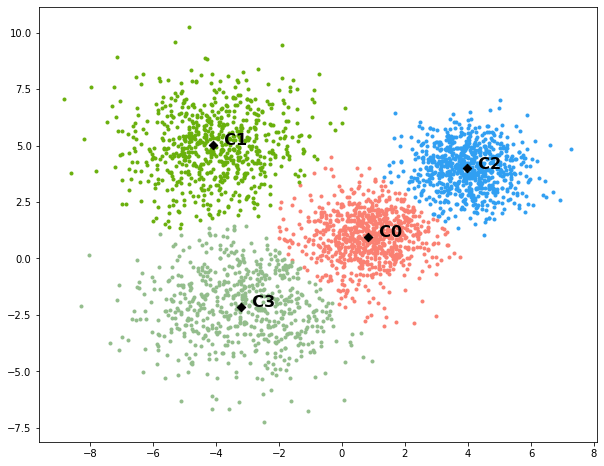

In [293]:
import itertools

colors = ['#fa8072','#69b00b','#309ff2','#93bd8c','#997c55','#808000','#efffa1','#7fffd4']
color = itertools.cycle(colors)

plt.figure(figsize=(10,8))
for k in unique_labels:
  members = data[kmeans.labels_==k]
  plt.scatter(members[:,0], members[:,1], color=next(color), marker ='.')

for n, centroid in enumerate(kmeans.cluster_centers_): 
  plt.scatter(centroid[0], centroid[1], marker='D', color='k')
  plt.text(centroid[0],centroid[1], f'  C{n}', fontsize=16, weight="bold", color='k')

In [294]:
# Prediction
kmeans.predict(np.array([[-6,8]]))

array([1], dtype=int32)

In [297]:
for k in range(2,10):
  kmeans = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
  kmeans.fit(data)
  silhouette = silhouette_score(data, kmeans.labels_)
  print(f'Silhouette score for {k} clusters is {silhouette:.3f}')

Silhouette score for 2 clusters is 0.427
Silhouette score for 3 clusters is 0.532
Silhouette score for 4 clusters is 0.548
Silhouette score for 5 clusters is 0.504
Silhouette score for 6 clusters is 0.440
Silhouette score for 7 clusters is 0.442
Silhouette score for 8 clusters is 0.446
Silhouette score for 9 clusters is 0.369
